In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

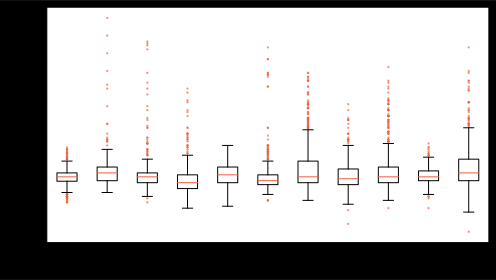

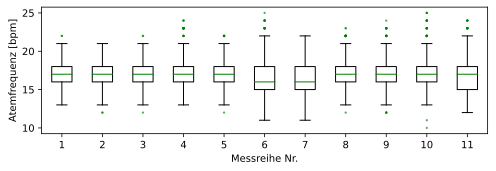

In [2]:
filenames = ["28112021",
    "29112021",
    "30112021",
    "01122021",
    "02122021",
    "03122021",
    "04122021",
    "05122021",
    "06122021",
    "07122021",
    "08122021"]
sensor_data = []
for fn in filenames:
    df = pd.read_csv(str("Sensordata/clean/"+fn+"_sensor_data"), index_col=None, header=0)
    sensor_data.append(df)
hrts = []
afs = []
for df_af_hf in sensor_data:
    hrts.append(df_af_hf["hr_sensor"].to_numpy())
    afs.append(df_af_hf["rr_sensor"].to_numpy())
fig = plt.figure(figsize=(7,4))
plt.style.use("default")
fp_hr = dict(marker='.', markersize=3, markerfacecolor='#F05C3C', alpha=0.5, markeredgecolor='#F05C3C', linestyle='none')
fp_rr = dict(marker='.', markersize=3, markerfacecolor='green', alpha=0.5, markeredgecolor='green', linestyle='none')
plt.boxplot(hrts,flierprops=fp_hr,medianprops={"color":"#F05C3C"})
plt.xlabel("Messreihe Nr.")
plt.ylabel("Herzfrequenz [bpm]")
plt.tight_layout()
plt.show()
fig = plt.figure(figsize=(7,2.5))
plt.boxplot(afs,flierprops=fp_rr,medianprops={"color":"green"})
plt.xlabel("Messreihe Nr.")
plt.ylabel("Atemfrequenz [bpm]")
plt.tight_layout()
plt.show()


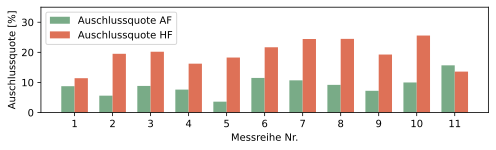

In [3]:
af_fehler=[8.74, 5.61, 8.84, 7.63, 3.61, 11.50, 10.71, 9.20, 7.23, 10.00, 15.69]
hf_fehler=[11.41, 19.51, 20.21, 16.24, 18.27, 21.68, 24.44, 24.48, 19.28, 25.58, 13.61]
width = 0.35
x=np.arange(11)
fig = plt.figure(figsize=(7,2.2))
plt.bar(x-width/2, af_fehler, width=width, color="#79ab87", label="Auschlussquote AF")
plt.bar(x+width/2, hf_fehler, width=width, color="#de7157", label="Auschlussquote HF")
plt.xticks(x, labels=[1,2,3,4,5,6,7,8,9,10,11])
plt.xlabel("Messreihe Nr.")
plt.ylabel("Auschlussquote [%]")
plt.ylim(top=35)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
import SleepAnalysisDSP as sa
from scipy import signal
from sklearn.metrics import ConfusionMatrixDisplay, cohen_kappa_score
import sklearn.metrics as skm
df_sensor = pd.read_csv("Sensordata/clean/all_sensor_data.csv")
df_withings = pd.read_csv("Withings_Data/clean/all_withings_data.csv")
hr_sensor = df_sensor["hr_sensor"].to_list()
hr_withings = df_withings["hr_withings"].to_list()
hr_s_norm = hr_sensor - np.median(hr_sensor)
hr_w_norm = hr_withings - np.median(hr_withings)
hr_s_clipped = hr_sensor
hr_w_clipped = hr_withings
hr_cross_corr = signal.correlate(hr_s_norm, hr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(hr_cross_corr)/2), int(-len(hr_cross_corr)/2)+int(len(hr_cross_corr)))
# just to have a jupyter var visible for correction
a_offset_hr = hr_cross_corr.index(max(hr_cross_corr))-int(len(hr_cross_corr)/2)
rr_sensor = df_sensor["rr_sensor"].to_list()
rr_withings = df_withings["rr_withings"].to_list()
rr_s_norm = rr_sensor - np.median(rr_sensor)
rr_w_norm = rr_withings - np.median(rr_withings)
rr_s_clipped = rr_sensor
rr_w_clipped = rr_withings
rr_cross_corr = signal.correlate(rr_s_norm, rr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(rr_cross_corr)/2), int(-len(rr_cross_corr)/2)+int(len(rr_cross_corr)))
# just to have a jupyter var visible for correction
a_offset_rr = rr_cross_corr.index(max(rr_cross_corr))-int(len(rr_cross_corr)/2)
ss_sensor = df_sensor["ss_sensor"].to_list()
ss_withings = df_withings["ss_withings"].to_list()
ss_s_norm = ss_sensor - np.median(ss_sensor)
ss_w_norm = ss_withings - np.median(ss_withings)
ss_s_clipped = ss_sensor
ss_w_clipped = ss_withings
ss_cross_corr = signal.correlate(ss_s_norm, ss_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(ss_cross_corr)/2), int(-len(ss_cross_corr)/2)+int(len(ss_cross_corr)))
# just to have a jupyter var visible for correction
a_offset_ss = ss_cross_corr.index(max(ss_cross_corr))-int(len(ss_cross_corr)/2)

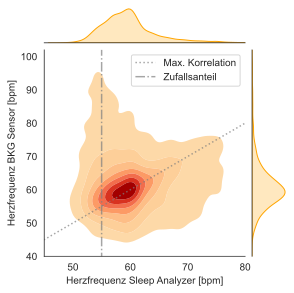

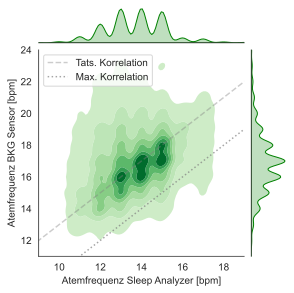

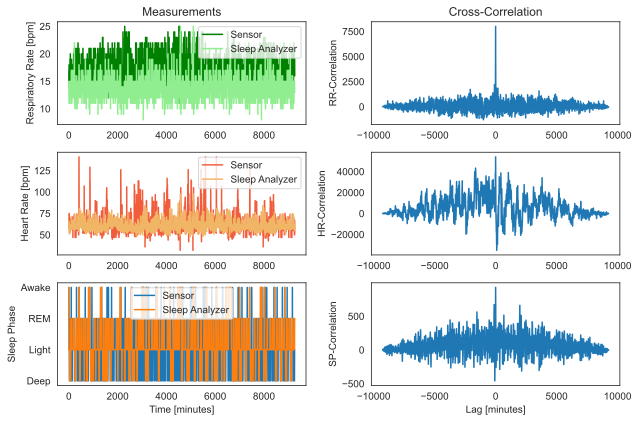

In [5]:
#fig, ax = plt.subplots(1, 3, figsize=(9,3))
from matplotlib import cm
from matplotlib.colors import ListedColormap
reg = np.linspace(0,150,5)
sns.set_style("white")
RedsBig = cm.get_cmap('OrRd', 512)
newcmpr = ListedColormap(RedsBig(np.linspace(0.2, 1.0, 256)))
hr_plot = sns.jointplot(x=hr_w_clipped, y=hr_s_clipped, kind="kde", levels=8, fill=True, color="orange", cmap=newcmpr, height=4, xlim=(45,80), ylim=(40,102))
hr_plot.set_axis_labels('Herzfrequenz Sleep Analyzer [bpm]', 'Herzfrequenz BKG Sensor [bpm]')
hr_plot.ax_joint.plot(reg,reg,color="grey",linestyle=":", alpha=0.7, label="Max. Korrelation")
hr_plot.ax_joint.plot([55,55,55,55,55],reg,color="grey",linestyle="-.", alpha=0.7, label="Zufallsanteil")
hr_plot.ax_joint.legend()
sns.set_style("white")
GreensBig = cm.get_cmap('Greens', 512)
newcmpg = ListedColormap(GreensBig(np.linspace(0.2, 1.0, 256)))
rr_plot = sns.jointplot(x=rr_w_clipped, y=rr_s_clipped, kind="kde", levels=8, fill=True, color="green", cmap=newcmpg, height=4, xlim=(9,19), ylim=(11,24))
rr_plot.set_axis_labels('Atemfrequenz Sleep Analyzer [bpm]', 'Atemfrequenz BKG Sensor [bpm]')
rr_plot.ax_joint.plot(reg,reg+3,color="grey",linestyle="--", alpha=0.4, label="Tats. Korrelation")
rr_plot.ax_joint.plot(reg,reg,color="grey",linestyle=":", alpha=0.7, label="Max. Korrelation")
rr_plot.ax_joint.legend()
plt.show()

#plt.style.use('default')
plt.figure(figsize=(9,6))
plt.subplot(321, title="Measurements", ylabel="Respiratory Rate [bpm]")
plt.plot(rr_s_clipped, label="Sensor", color="green")
plt.plot(rr_w_clipped, label="Sleep Analyzer", color="lightgreen")
plt.legend()
plt.subplot(322, title="Cross-Correlation", ylabel="RR-Correlation")
plt.plot(x_vals, rr_cross_corr)
plt.subplot(323, ylabel="Heart Rate [bpm]")
plt.plot(hr_s_clipped, label="Sensor", color="#F05C3C")
plt.plot(hr_w_clipped, label="Sleep Analyzer", color="#f0b665")
plt.legend()
plt.subplot(324, ylabel="HR-Correlation")
plt.plot(x_vals, hr_cross_corr)
plt.subplot(325, xlabel="Time [minutes]", ylabel="Sleep Phase")
plt.plot(ss_s_clipped, label="Sensor")
plt.plot(ss_w_clipped, label="Sleep Analyzer")
plt.legend()
plt.yticks([1,2,3,4],["Deep","Light","REM","Awake"])
plt.subplot(326,xlabel="Lag [minutes]", ylabel="SP-Correlation")
plt.plot(x_vals, ss_cross_corr)
plt.tight_layout()
plt.show()


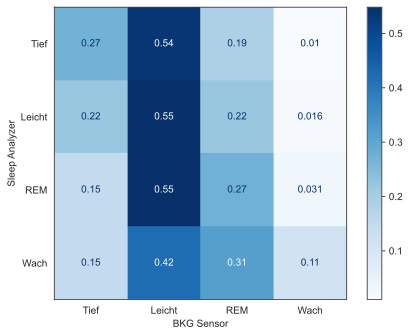

In [6]:
sns.set_style("white")
ConfusionMatrixDisplay.from_predictions(ss_w_clipped, ss_s_clipped, display_labels=["Tief","Leicht","REM","Wach"], cmap="Blues", colorbar=True, normalize="true")
plt.title(None)
plt.ylabel("Sleep Analyzer")
plt.xlabel("BKG Sensor")
plt.tight_layout()
plt.show()

In [7]:
from scipy.stats.stats import pearsonr, spearmanr
print(f"Heart Rate Accuracy: {skm.accuracy_score(hr_w_norm, hr_s_norm):.4f}")
print(f"Heart Rate Precision: {skm.precision_score(hr_w_norm, hr_s_norm, average='macro', zero_division=1):.4f}")
print(f"Heart Rate F1-Score: {skm.f1_score(hr_w_norm, hr_s_norm, average='weighted'):.4f}")
print(f"Respiratory Rate Accuracy: {skm.accuracy_score(rr_w_norm, rr_s_norm):.4f}")
print(f"Respiratory Rate Precision: {skm.precision_score(rr_w_norm, rr_s_norm, average='macro', zero_division=1):.4f}")
print(f"Respiratory Rate F1-Score: {skm.f1_score(rr_w_norm, rr_s_norm, average='weighted'):.4f}")
print(f"Sleep Phase Accuracy: {skm.accuracy_score(ss_w_clipped, ss_s_clipped):.4f}")
print(f"Sleep Phase Precision: {skm.precision_score(ss_w_clipped, ss_s_clipped, average='macro', zero_division=1):.4f}")
print(f"Sleep Phase F1-Score: {skm.f1_score(ss_w_clipped, ss_s_clipped, average='weighted'):.4f}\n")
print("PearsonR AF:", pearsonr(rr_s_clipped,rr_w_clipped))
print("SpearmanR AF:", spearmanr(rr_s_clipped,rr_w_clipped))
print("PearsonR HF:", pearsonr(hr_s_clipped,hr_w_clipped))
print("SpearmanR HF:", spearmanr(hr_s_clipped,hr_w_clipped))
print("PearsonR SP:", pearsonr(ss_s_clipped,ss_w_clipped))
print("SpearmanR SP:", spearmanr(ss_s_clipped,ss_w_clipped))
print(skm.classification_report(ss_w_clipped, ss_s_clipped, target_names=["Tief","Leicht","REM","Wach"]))

Heart Rate Accuracy: 0.1014
Heart Rate Precision: 0.0258
Heart Rate F1-Score: 0.1093
Respiratory Rate Accuracy: 0.2890
Respiratory Rate Precision: 0.2717
Respiratory Rate F1-Score: 0.3025
Sleep Phase Accuracy: 0.4196
Sleep Phase Precision: 0.3327
Sleep Phase F1-Score: 0.4246

PearsonR AF: (0.29035912040624917, 2.3616912934845787e-179)
SpearmanR AF: SpearmanrResult(correlation=0.3393384481404912, pvalue=2.626631641451386e-248)
PearsonR HF: (0.10145130918553685, 1.2801864571261135e-22)
SpearmanR HF: SpearmanrResult(correlation=0.17689566357420794, pvalue=5.614347804031628e-66)
PearsonR SP: (0.15360610543870726, 5.281014105176848e-50)
SpearmanR SP: SpearmanrResult(correlation=0.13895673613471074, pvalue=3.7302782078092994e-41)
              precision    recall  f1-score   support

        Tief       0.19      0.27      0.22      1351
      Leicht       0.59      0.55      0.57      5327
         REM       0.25      0.27      0.26      1979
        Wach       0.30      0.11      0.17      

In [8]:
df0 = pd.read_excel("Evaluation_Data\Evaluation.xlsx", sheet_name=0, usecols=["Beschreibung","Tief","Leicht","REM","Wach"])
df1 = pd.read_excel("Evaluation_Data\Evaluation.xlsx", sheet_name=0, usecols=["Beschreibung","Tief %","Leicht %","REM %","Wach %"])
df1.rename(columns = {'Tief %':'Tief', 'Leicht %':'Leicht',"REM %":"REM","Wach %":"Wach"}, inplace = True)
df2 = pd.read_excel("Evaluation_Data\Evaluation.xlsx", sheet_name=1)
df3 = pd.read_excel("Evaluation_Data\Evaluation.xlsx", sheet_name=0, usecols=["ID","Beschreibung","HF","AF"])
df0_melted = pd.melt(df0, id_vars=["Beschreibung"], value_vars=df1[["Tief","Leicht","REM","Wach"]], var_name="Schlafphase", value_name="Dauer [hh:mm]")
df0_melted["tc"]=pd.to_datetime(df0_melted["Dauer [hh:mm]"], format="%H:%M:%S")
df0_melted["Dauer [hh:mm]"]=pd.to_datetime(df0_melted["Dauer [hh:mm]"], format="%H:%M:%S")
timecodes = pd.DatetimeIndex(df0_melted["tc"])
df0_melted["tc"] = timecodes.hour * 60 + timecodes.minute
df1_melted = pd.melt(df1, id_vars=["Beschreibung"], value_vars=df1[["Tief","Leicht","REM","Wach"]], var_name="Schlafphase", value_name="Anteil an der Gesamtdauer [%]")
df1_melted["Anteil an der Gesamtdauer [%]"] = 100*df1_melted["Anteil an der Gesamtdauer [%]"]
df2_melted = pd.melt(df2, id_vars=["Parameter"], value_vars=df2[["Accuracy","Precision","F1-Score"]], var_name="Metrik", value_name="Score")
df3_melted = pd.melt(df3, id_vars=["ID","Beschreibung"], value_vars=df3[["AF","HF"]], var_name="Parameter", value_name="BPM")

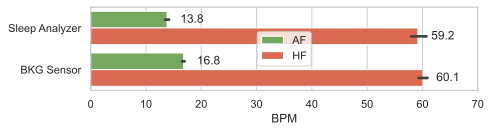

In [9]:
sns.set(rc={'figure.figsize':(7,2)})
sns.set_style("whitegrid")
ax1 = sns.barplot(y="Beschreibung", x="BPM", hue="Parameter", data=df3_melted, palette=["#73b354", "#F05C3C"], estimator=np.mean)
ax1.set_ylabel(None)
#plt.yticks(rotation=90, va="center")
for container in ax1.containers:
    ax1.bar_label(container,fmt='    %.1f')
plt.legend(loc="center")
plt.xlim(right=70)
plt.tight_layout()

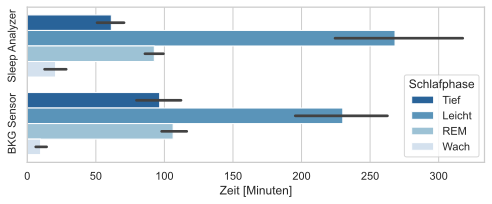

In [10]:
sns.set(rc={'figure.figsize':(7,3)})
sns.set_style("whitegrid")
ax0 = sns.barplot(y="Beschreibung", x="tc", hue="Schlafphase", data=df0_melted, palette="Blues_r")
ax0.set_xlabel("Zeit [Minuten]")
ax0.set_ylabel(None)
plt.yticks(rotation=90, va="center")
plt.tight_layout()

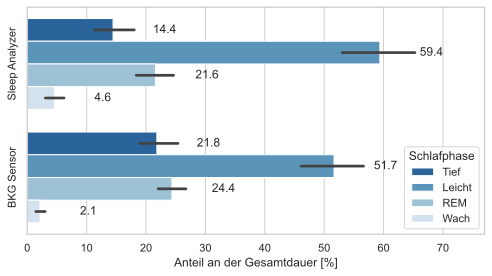

In [25]:
ax5 = sns.barplot(y="Beschreibung", x="Anteil an der Gesamtdauer [%]", hue="Schlafphase", data=df1_melted, palette="Blues_r")
plt.yticks(rotation=90, va="center")
ax5.set_ylabel(None)
plt.legend(title="Schlafphase",loc="lower right")
for container in ax5.containers:
    ax5.bar_label(container,fmt='            %.1f')
plt.xlim(right=77)
plt.tight_layout()

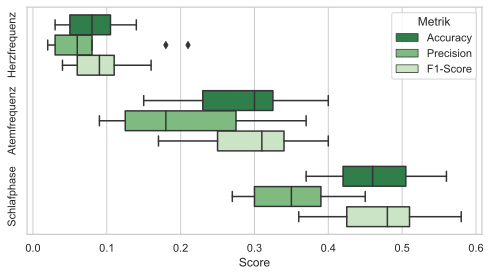

In [12]:
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid")
ax2 = sns.boxplot(data=df2_melted, y="Parameter", x="Score", hue="Metrik", palette="Greens_r").set(ylabel=None)
plt.yticks(rotation=90, va="center")
plt.tight_layout()